<a href="https://colab.research.google.com/github/YevheniiPotapenko/-.-/blob/main/_%22%D0%9B_%D0%A0_3%2C%D0%9F%D0%BE%D1%82%D0%B0%D0%BF%D0%B5%D0%BD%D0%BA%D0%B0_%D0%84%D0%B2%D0%B3%D0%B5%D0%BD%D0%B0_%D0%9E%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%B8%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 3, Потапенка Євгена Олександровича, Група ФІТ 2-15, Варіант 11. Тема: «Чисельні методи розв’язання нелінійних рівнянь»

In [51]:
import numpy as np
import pandas as pd

# Визначаємо функцію
def f (x):
    y = 3*x**4+2*x**3+x**2+x-5
    return y
# Визначаємо границі відрізку
a = -3
b = -1
# Визначаємо точність розв'язку
h = 0.001
# Поділяємо відрізок навпіл
c = (a+b)/2
# Зберігаємо результати обчислень
data_A = [a]
data_B = [b]
data_C = [c]
data_F_A = [f(a)]
data_F_B = [f(b)]
data_F_C = [f(c)]
# Перевіряємо досягнення точності
while abs(f(c)) > h:
    # Звужуємо відрізок
    if np.sign(f(c)) == np.sign(f(a)):
        a = c
    else:
        b = c
    # Поділяємо відрізок навпіл
    c = (a+b)/2
    # Зберігаємо результати обчислень
    data_A.append(a)
    data_B.append(b)
    data_C.append(c)
    data_F_A.append(f(a))
    data_F_B.append(f(b))
    data_F_C.append(f(c))
# Відображаємо результати обчислень
print('Результати обчислень')
print()
data = pd.DataFrame({'a': data_A,
                     'F(a)': data_F_A,
                     'c': data_C,
                     'F(c)': data_F_C,
                     'b': data_B,
                     'F(b)': data_F_B})
print(data)
# Відображаємо наближений корінь рівняння
print()
print('В точці с = ', c, ', f(c) = ', f(c))

Результати обчислень

           a        F(a)         c       F(c)         b      F(b)
0  -3.000000  190.000000 -2.000000  29.000000 -1.000000 -4.000000
1  -2.000000   29.000000 -1.500000   4.187500 -1.000000 -4.000000
2  -1.500000    4.187500 -1.250000  -1.269531 -1.000000 -4.000000
3  -1.500000    4.187500 -1.375000   1.039795 -1.250000 -1.269531
4  -1.375000    1.039795 -1.312500  -0.209183 -1.250000 -1.269531
5  -1.375000    1.039795 -1.343750   0.390460 -1.312500 -0.209183
6  -1.343750    0.390460 -1.328125   0.084588 -1.312500 -0.209183
7  -1.328125    0.084588 -1.320312  -0.063790 -1.312500 -0.209183
8  -1.328125    0.084588 -1.324219   0.010023 -1.320312 -0.063790
9  -1.324219    0.010023 -1.322266  -0.026977 -1.320312 -0.063790
10 -1.324219    0.010023 -1.323242  -0.008500 -1.322266 -0.026977
11 -1.324219    0.010023 -1.323730   0.000756 -1.323242 -0.008500

В точці с =  -1.32373046875 , f(c) =  0.0007558216076972712


2. Метод ділення навпіл

In [52]:
import numpy as np
import scipy.optimize as sp

def f(x):
    y = 3*x**4+2*x**3+x**2+x-5
    return y

a = -3
b = -1
tol = 1.e-3

x = sp.bisect(f, a,b,(),tol) #функція для метода

print('The approximate solution x is:', x)
print('And the value f(x) is:', f(x))

The approximate solution x is: -1.3232421875
And the value f(x) is: -0.008500113949594379


3. Метод хорд

In [53]:
import numpy as np
import pandas as pd
# Визначаємо функцію
def f(x):
    y =  3*x**4+2*x**3+x**2+x-5
    return y
# Визначаємо межі відрізку
a = -3
b = -1
# Визначаємо точність розв'язку
h = 0.001
# Точка, де хорда перетинає вісь 0x
c = (f(a)*b-a*f(b))/(f(a)-f(b))

# Зберігаємо результати обчислень
data_A = [a]
data_B = [b]
data_C = [c]
data_F_A = [f(a)]
data_F_B = [f(b)]
data_F_C = [f(c)]
# Перевіряємо досягнення точності
while abs(f(c)) > h:
    # Звужуємо відрізок
    if np.sign(f(c)) == np.sign(f(a)):
        a = c
    else:
        b = c
    # Точка, де хорда перетинає вісь 0x
    c = (f(a)*b-a*f(b))/(f(a)-f(b))
    # Зберігаємо результати обчислень
    data_A.append(a)
    data_B.append(b)
    data_C.append(c)
    data_F_A.append(f(a))
    data_F_B.append(f(b))
    data_F_C.append(f(c))
# Відображаємо результати обчислень
print('Результати обчислень')
print()
data = pd.DataFrame({'a': data_A, 'F(a)': data_F_A,
                     'c': data_C, 'F(c)': data_F_C,
                     'b': data_B, 'F(b)': data_F_B})
print(data)
# Відображаємо наближений корінь рівняння
print()
print('В точці с = ', c, ', f(c) = ', f(c))

Результати обчислень

    a  F(a)         c      F(c)         b      F(b)
0  -3   190 -1.041237 -3.688524 -1.000000 -4.000000
1  -3   190 -1.078539 -3.365080 -1.041237 -3.688524
2  -3   190 -1.111978 -3.038637 -1.078539 -3.365080
3  -3   190 -1.141697 -2.717445 -1.111978 -3.038637
4  -3   190 -1.167900 -2.408503 -1.141697 -2.717445
5  -3   190 -1.190834 -2.117256 -1.167900 -2.408503
6  -3   190 -1.210772 -1.847514 -1.190834 -2.117256
7  -3   190 -1.228003 -1.601538 -1.210772 -1.847514
8  -3   190 -1.242814 -1.380247 -1.228003 -1.601538
9  -3   190 -1.255487 -1.183483 -1.242814 -1.380247
10 -3   190 -1.266286 -1.010284 -1.255487 -1.183483
11 -3   190 -1.275456 -0.859141 -1.266286 -1.010284
12 -3   190 -1.283219 -0.728215 -1.275456 -0.859141
13 -3   190 -1.289774 -0.615514 -1.283219 -0.728215
14 -3   190 -1.295296 -0.519016 -1.289774 -0.615514
15 -3   190 -1.299940 -0.436763 -1.295296 -0.519016
16 -3   190 -1.303839 -0.366917 -1.299940 -0.436763
17 -3   190 -1.307109 -0.307797 -1.303839 

4. Метод Ньютона (дотичних)

In [54]:
import numpy as np
import pandas as pd

# Визначаємо функцію
def f(x):
    y = 3*x**4 + 2*x**3 + x**2 + x - 5
    return y
# Визначаємо першу похідну
def df(x):

    y1 = 12*x**3
    y2 = 6*x**2
    y3 = 2*x
    y4 = 1
    y = y1 + y2 + y3 + y4
    return y

# Визначаємо початкову точку
c = 1.0

# Визначаємо точність розв'язку
h = 0.001

# Зберігаємо результати обчислень
data_C = [c]
data_F_C = [f(c)]

# Перевіряємо досягнення точності
while abs(f(c)) > h:
    # Точка, де дотична перетинає вісь 0x
    c -= f(c)/df(c)
    # Зберігаємо результати обчислень
    data_C.append(c)
    data_F_C.append(f(c))

# Відображаємо результати обчислень
print('Результати обчислень')
print()
data = pd.DataFrame({'c': data_C, 'F(c)': data_F_C})
print(data)

# Відображаємо наближений корінь рівняння
print()
print('В точці c = ', c, ', f(c) = ', f(c))

Результати обчислень

          c          F(c)
0  1.000000  2.000000e+00
1  0.904762  2.149105e-01
2  0.891822  3.515688e-03
3  0.891603  9.893522e-07

В точці c =  0.8916034506886681 , f(c) =  9.893521770720781e-07


5. Метод Ньютона (дотичних)

In [55]:
import numpy as np
import scipy.optimize as sp

def f(x):
    y = 3*x**4 + 2*x**3 + x**2 + x - 5
    return y

def df(x):
    y = 12*x**3 + 6*x**2 + 2*x + 1
    return y

x0 = -1.5
x1 = 1.0

x_0 = sp.newton(f, x0, df, tol=1.e-3, maxiter=50)
x_1 = sp.newton(f, x1, df, tol=1.e-3, maxiter=50)

print('The approximate solution x is:', x_0)
print('And the value f(x_0) is:', f(x_0))

print('The approximate solution x is:', x_1)
print('And the value f(x_1) is:', f(x_1))

The approximate solution x is: -1.3236906198443201
And the value f(x_0) is: 1.0440537323574972e-10
The approximate solution x is: 0.8916034506886681
And the value f(x_1) is: 9.893521770720781e-07


 # Знаходження коренів рівняння за допомогою бібліотеки SymPy

In [56]:
import sympy as sym
x = sym.Symbol('x')

y = 3*x**4 + 2*x**3 + x**2 + x - 5
solutions = sym.solve(y, x)

print("Знайдені корені рівняння:")
for i, sol in enumerate(solutions):
    print(f"x_{i+1} = {sol.evalf()}")

Знайдені корені рівняння:
x_1 = 0.891603389078954
x_2 = -0.117289717953403 - 1.18255009165865*I
x_3 = -0.117289717953403 + 1.18255009165865*I
x_4 = -1.32369061983882


In [57]:
import sympy as sym

x, a, b, c = sym.symbols('x, a, b, c')

y = a * x**2 + b * x + c

s = sym.solve(y, x)

print(s)

[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]


In [58]:
!pip install numdifftools

In [59]:
#Лабораторна робота 2
#Відокремлення коренів
import numpy as np
import numdifftools as nd
def f(x):
    return 3*x**4+2*x**3+x**2+x-5



def find_segments():
    search_range = np.arange(-10, 4, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Found segment:  [{a}, {b}]')




Found segment:  [-2, -1]
Found segment:  [0, 1]


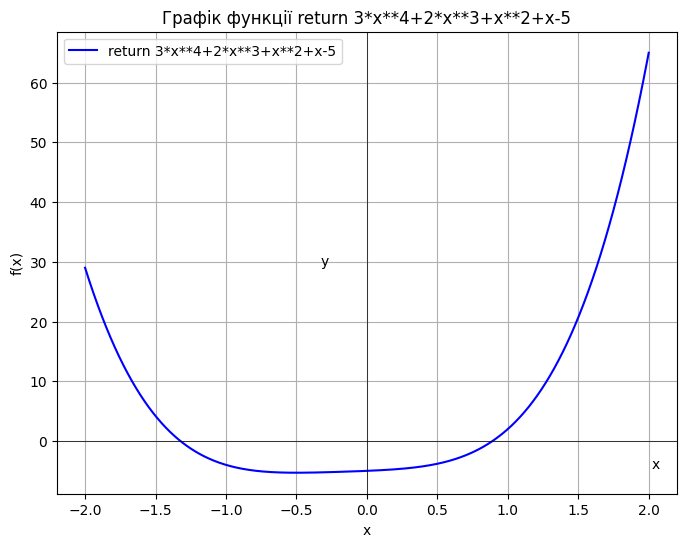

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функції
def f(x):
    return 3*x**4+2*x**3+x**2+x-5

# Генерація значень x
x = np.linspace(-2, 2, 400)

# Генерація значень y
y = f(x)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='return 3*x**4+2*x**3+x**2+x-5', color='blue')
plt.title('Графік функції return 3*x**4+2*x**3+x**2+x-5')
plt.xlabel('x')
plt.ylabel('f(x)')

# Додавання осей з стрілками
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.text(2.05, -4, 'x', ha='center', va='center')
plt.text(-0.3, 30, 'y', ha='center', va='center')

plt.grid(True)
plt.legend()
plt.show()


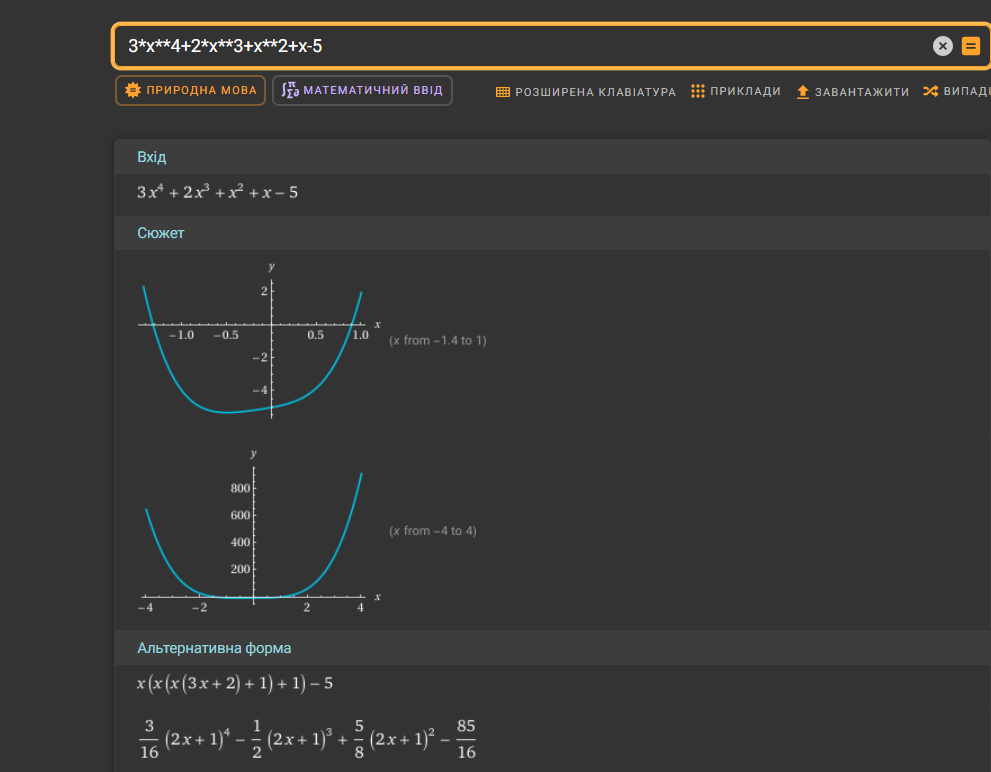

In [61]:
#Лабораторна робота. Метод половинного ділення, хорд


def f(x):
    return 3*x**4 + 2*x**3 + x**2 + x - 5

def rec(a, b, eps):
    while (abs(a - b) > eps):
        c = (a + b) / 2
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    x = (a + b) / 2
    print('x =', round(x, 5), ' - Метод половинного ділення')

def hord(a, b, eps):
    def df(x):
        return 12*x**3 + 6*x**2 + 2*x + 1

    if f(a) * df(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a

    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while (abs(xi_1 - xi) > eps):
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x =', round(xi_1, 5), ' - Метод хорд')

if __name__ == "__main__":

    a1, b1 = -2, -1
    a2, b2 = 0, 1
    eps = 0.001

    print("Розв'язки на відрізку [-2,-1]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)

    print("\nРозв'язки на відрізку [0,1]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)

Розв'язки на відрізку [-2,-1]
x = -1.32373  - Метод половинного ділення
x = -1.32393  - Метод хорд

Розв'язки на відрізку [0,1]
x = 0.89209  - Метод половинного ділення
x = 0.89155  - Метод хорд


In [62]:
#Лабораторна робота 3. Метод Ньютона (дотичних). Комбінований метод



import numdifftools as nd

def nuton(a, b, eps, f):
    df2 = nd.Derivative(f, n=2)(b)
    if f(b) * df2 > 0:
        x1 = b
        x = a
    else:
        x1 = a
        x = b
    df = nd.Derivative(f, n=1)
    while abs(x1 - x) > eps:
        x1 = x - f(x) / df(x)
    print("Метод Ньютона, x =", x1.round(4))

def komb(a, b, eps, f):
    df2 = nd.Derivative(f, n=2)(a)
    if f(a) * df2 > 0:
        a1 = a
        b1 = b
    else:
        a1 = b
        b1 = a
    bi = a1
    bi1 = b1
    while abs(bi1 - bi) > eps:
        ai = a1 - f(a1) * (b1 - a1) / (f(b1) - f(a1))
        bi = bi1 - f(b1) / nd.Derivative(f, n=1)(b1)
        a1 = ai
        b1 = bi
    x = (a1 + b1) / 2
    print("Комбінований метод, x =", x.round(4))

if __name__ == "__main__":
    f = lambda x: 3*x**4 + 2*x**3 + x**2 + x - 5
    a1, b1 = -5, -4
    a2, b2 = 1, 2
    eps = 0.001

    print("Розв'язання на відрізку [-5, -4]")
    nuton(a1, b1, eps, f)
    komb(a1, b1, eps, f)

    print("Розв'язання на відрізку [1, 2]")
    nuton(a2, b2, eps, f)
    komb(a2, b2, eps, f)


Розв'язання на відрізку [-5, -4]


KeyboardInterrupt: 

Висновок:Дана лабораторна робота начала мене розв'язувати обчислювати корені нелінійного рівняння методом Ньютона та комбінованим методом.
